The notebook investigates the process $e^-e^+\to \pi^- \pi^+$ or more precisely the production of pointlike scalar particles via electromagnetic interaction. For real pions the amplitudes have to be multiplied by a formfactor, as explained in the book (section 5.2.3).

### 1) Setup

In [1]:
from sympy import *

In [2]:
import heppackv0 as hep

Reading heppackv0.py (March 2023)

Done


In [3]:
M,m,theta,phi, alpha=symbols('M m theta phi alpha',real=True)
t,t0,s,s0,p=symbols('t t0,s,s0,p',real=True)
E,P,beta,xi=symbols('E P beta xi',positive=True)

This tutorial will be less verbose than eemmuu.ipynb. Because the amplitudes are very simple we can afford to include a possible $\phi$ dependence right from the beginning.

In [4]:
pin=[E,m,0,0]
ki=[E,m,pi,pi]
pf=[E,M,theta,phi]
kf=[E,M,pi-theta,pi+phi]

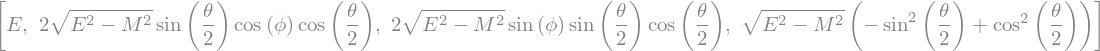

In [5]:
pf4=hep.fourvec(pf);pf4

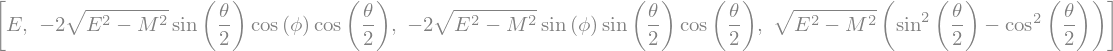

In [6]:
kf4=hep.fourvec(kf);kf4

### 2) Cross section

The Feynman rules require $p^\mu_f-k^\mu_f$ at the outgoing vertex. Here this is done by hand because Jupyter refuses subtraction of lists. One also learns that Jupyter starts the indexing of vectors etc with 0.

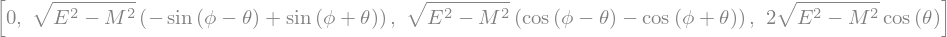

In [7]:
p4=[0,2*simplify(hep.fourvec(pf)[1]),2*simplify(hep.fourvec(pf)[2]),2*simplify(hep.fourvec(pf)[3])];p4

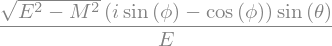

In [8]:
tmp=hep.dotprod4(hep.vbu(ki,1,pin,-1),p4)/4/E**2;tmp

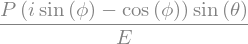

In [9]:
t1=tmp.subs(E**2-M**2,P**2);t1

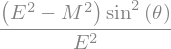

In [10]:
t1sq=simplify((t1*conjugate(t1)).subs(P**2,E**2-M**2));t1sq

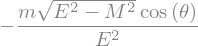

In [11]:
t2=hep.dotprod4(hep.vbu(ki,1,pin,1),p4)/4/E**2;t2

The the cross section for unpolarized beams is independent of $\phi$.

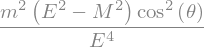

In [12]:
t2sq=t2**2;t2sq

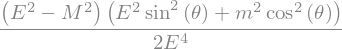

In [13]:
tsqav=simplify((t1sq+t2sq)/2);tsqav

The invariants $t,t_0,s$ expressed in CM variables:

In [14]:
tCM=m**2+M**2-2*E**2+2*sqrt(E**2-m**2)*sqrt(E**2-M**2)*cos(theta);tCM

In [15]:
t0CM=tCM-M**2-m**2;t0CM

In [16]:
sCM=4*E**2;sCM

Guessing from the results of eemumu we try

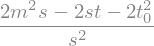

In [17]:
tsqav_inv=2*(s*m**2-s*t-t0**2)/s**2;tsqav_inv

In [18]:
tsqav_inv2=tsqav_inv.subs([(s,sCM),(t,tCM),(t0,t0CM)])

In [19]:
tsqav!=tsqav_inv2

True

and prove it. Another useful form is

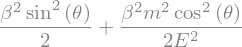

In [20]:
tsqav_alt=beta**2*sin(theta)**2/2+m**2*beta**2*cos(theta)**2/2/E**2;tsqav_alt

In [21]:
simplify(tsqav_alt.subs(beta**2,1-M**2/E**2)-tsqav)

### 3) Polarized Beams

In contrast to the procedure in the eemumu notebook we here have pions travelling in the $\theta,\phi$ direction produced from positrons and electrons  with spins up and down along the $x$ axis. The columns of the transformation matrix yield for $\theta=\pi/2, \phi=0$
$$\left|\uparrow\right\rangle={\textstyle\frac{1}{\sqrt{2}}\left(|\frac{1}{2}\rangle+|\frac{-1}{2}\rangle\right)}$$

$$\left|\downarrow\right\rangle={\textstyle\frac{1}{\sqrt{2}}\left(-|\frac{1}{2}\rangle+|\frac{-1}
{2}\rangle\right)}$$
leading to the helicity states 

$$\begin{array}[]{ll}\left|e^+\uparrow\right\rangle&={\textstyle\frac{1}{\sqrt{2}}\left(|e^+,R\rangle+|e^+,L\rangle\right)}\\ \left|e^-\downarrow\right\rangle&={\textstyle\frac{1}{\sqrt{2}}\left(-|e^-,L\rangle+|e^-,R\rangle\right)}\enspace.\end{array}$$
The incoming state is calculated from the product of the helicity staes. For $m=0$ unly
$$\left|e^+\uparrow\right\rangle\left|e^-\downarrow\right\rangle=\textstyle\frac{1}{2}\left(|e^+,L\rangle|e^-,R\rangle-|e^+,R\rangle|e^-,L\rangle\right)\enspace $$
survives. Thus the incoming current has to be calculatet from 
$\bar{v_L}(k_i)\gamma^{\mu}u_R(p_i)-\bar{v_R}(k_i)\gamma^{\mu}u_L(p_i)$.

In [22]:
hep.vbu(ki,-1,pin,1)

In [23]:
hep.vbu(ki,1,pin,-1)

In [24]:
vbudif=[0,-2*E,0,0];vbudif

The calculation of the amplitude is very simple via

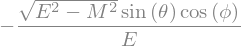

In [25]:
tmp=simplify(vbudif[1]*p4[1])/4/E**2;tmp

which gives (up to kinematical factors) the polarized cross section after squaring and polishing

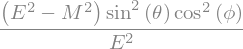

In [26]:
polsqP=tmp**2;polsqP

In [27]:
sigP=polsqP.subs(E**2-M**2,E**2*beta**2);sigP

which is the result of the standard reference Y.S.Tsai, PRD12, 3533 (1975). Combining with the unpolarized cross section (next line) we obtain the result for beams with 
a partial polarization $\xi^2$

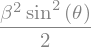

In [28]:
sigU=beta**2*sin(theta)**2/2;sigU

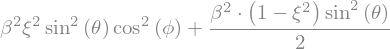

In [29]:
(1-xi**2)*sigU+xi**2*sigP

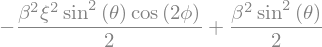

In [30]:
sig=sigU-(xi**2*beta**2*sin(theta)**2*cos(2*phi))/2;sig

and finally after conventionally switching to a magnetic field along the $y$ axis the cross section $d\sigma/d\Omega$ 

dsigma/dOmega=


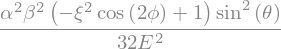

In [31]:
dsigdOm=simplify(alpha**2/16/E**2*sig);print('dsigma/dOmega='); dsigdOm

### 4) e$\pi$ scattering

The amplitudes squared for $e\pi$ scattering is obtained via crossing $s\leftrightarrow t$ with a minus sign because
only one fermion line is crossed

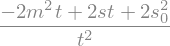

In [32]:
tsqav_sc=-2*(t*m**2-s*t-s0**2)/t**2;tsqav_sc

dsigma/dt=


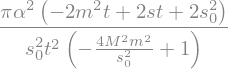

In [33]:
dsigdt=16*pi**2*alpha**2/(16*pi*s0**2*(1-4*m**2*M**2/s0**2))*tsqav_sc;print('dsigma/dt='); dsigdt

The Mott cross section is obtained in the limit $M \rightarrow\infty$. It is identical to the result of eemumu notebook. The basic difference between pions and protons is the magnetic moment of the proton which is proportional to $1/M$.